some explanation for argoverse2 submodule

In [71]:
import matplotlib.pyplot as plt
import mediapy
import numpy as np
import pptk

import py_utils.visualization_pptk
import scene_point_etk.argoverse2 as argoverse2

In [2]:
# argoverse2.list_log_ids_by_mode("val")
# argoverse2.list_log_ids_by_mode("test)
log_id = argoverse2.list_log_ids_by_mode("train")[0]
log_id

'00a6ffc16ce93bc3a0606006e9893a1a'

---
SweepSequence

In [3]:
# coordinate can be either "ego" or "map"
sweep_sequence = argoverse2.SweepSequence(log_id=log_id, coordinate="map")
sweep_sequence

<SweepSequence contains 157 sweeps for log 00a6ffc16ce93bc3a0606006e9893a1a>

In [8]:
# indexing
print(sweep_sequence[0])
print(sweep_sequence[:5])
print(sweep_sequence[10:16])
print(sweep_sequence[slice(20, 27)])

<SweepSequence contains 1 sweeps for log 00a6ffc16ce93bc3a0606006e9893a1a>
<SweepSequence contains 5 sweeps for log 00a6ffc16ce93bc3a0606006e9893a1a>
<SweepSequence contains 6 sweeps for log 00a6ffc16ce93bc3a0606006e9893a1a>
<SweepSequence contains 7 sweeps for log 00a6ffc16ce93bc3a0606006e9893a1a>


In [10]:
# get point clouds from the sweep sequences

xyz_1 = sweep_sequence[0].xyz  # points from the first sweep
xyz_2 = sweep_sequence[::10].xyz  # points from every 10th sweep
xyz_3 = sweep_sequence.xyz  # points from all sweeps

intensity_1 = sweep_sequence[0].intensity
intensity_2 = sweep_sequence[::10].intensity
intensity_3 = sweep_sequence.intensity

print(xyz_1.shape, xyz_2.shape, xyz_3.shape)
print(intensity_1.shape, intensity_2.shape, intensity_3.shape)

(98236, 3) (1585197, 3) (15563617, 3)
(98236,) (1585197,) (15563617,)


visualize point clouds

In [ ]:
# this will spawn external PPTK viewer windows
# (only available on local machines)
v1 = pptk.viewer(xyz_1, intensity_1)
v2 = pptk.viewer(xyz_2, intensity_2)
v3 = pptk.viewer(xyz_3, intensity_3)

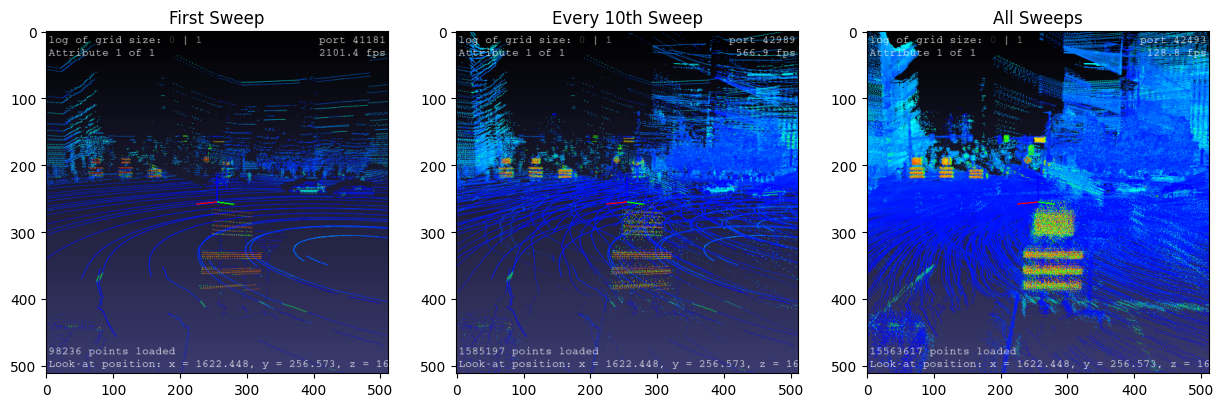

In [17]:
v1.capture("temp.1.png")
v2.capture("temp.2.png")
v3.capture("temp.3.png")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("First Sweep")
axs[0].imshow(plt.imread("temp.1.png"))
axs[1].set_title("Every 10th Sweep")
axs[1].imshow(plt.imread("temp.2.png"))
axs[2].set_title("All Sweeps")
axs[2].imshow(plt.imread("temp.3.png"))

Inferring RGB[==============================] 100.0%


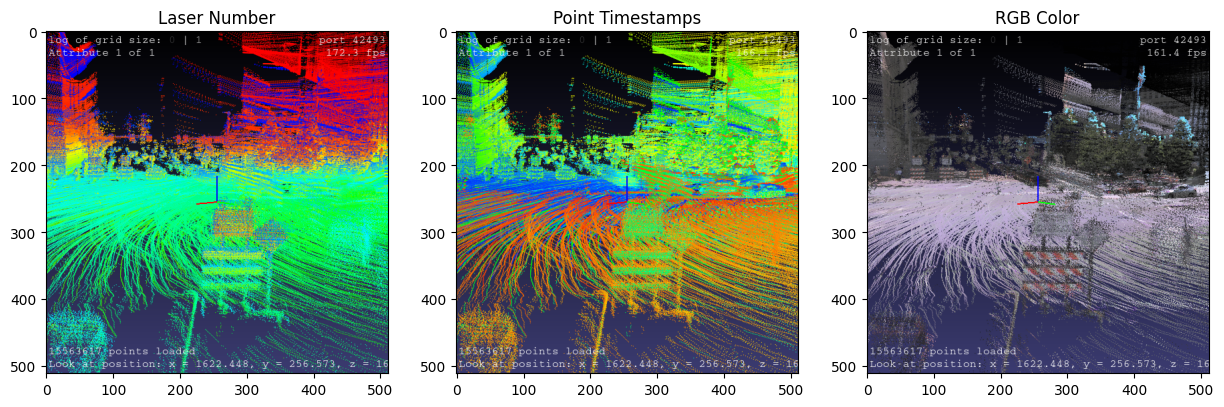

In [24]:
# also sweep_sequences can provide other attributes
v3.attributes(sweep_sequence.laser_number)
v3.capture("temp.3.1.png")

v3.attributes(sweep_sequence.point_timestamps)
v3.capture("temp.3.2.png")

v3.attributes(sweep_sequence.rgb / 255)
v3.capture("temp.3.3.png")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("Laser Number")
axs[0].imshow(plt.imread("temp.3.1.png"))
axs[1].set_title("Point Timestamps")
axs[1].imshow(plt.imread("temp.3.2.png"))
axs[2].set_title("RGB Color")
axs[2].imshow(plt.imread("temp.3.3.png"))

---
Annotations (3D bounding box sequences)

In [27]:
# coordinate can be either "ego" or "map"
annotations = argoverse2.Annotations(log_id, coordinate="map")
annotations

<Annotations contains 12637 objects on map>

In [35]:
# indexing
print(annotations[0])
print(annotations[:5])
print(annotations[10:16])
print(annotations[slice(20, 27)])

<Annotations contains 1 objects on map>
<Annotations contains 5 objects on map>
<Annotations contains 6 objects on map>
<Annotations contains 7 objects on map>


In [28]:
annotations.category

array(['BOX_TRUCK', 'BUS', 'BUS', ..., 'SIGN', 'SIGN', 'WHEELCHAIR'],
      dtype=object)

In [29]:
annotations.bounding_centers.shape, annotations.bounding_centers[:2]

((12637, 3),
 array([[1563.66936476,  245.13947221,   15.64504389],
        [1532.56608533,  244.76201132,   15.493452  ]]))

In [30]:
# margin: expand or shrink bounding boxes by this margin (in meters)
bboxes_vertices = annotations.bounding_box_vertices(margin=0.0)
bboxes_vertices.shape, bboxes_vertices[:2]

((12637, 8, 3),
 array([[[1566.52016975,  247.88723042,   17.1737893 ],
         [1566.48674551,  247.84426196,   13.98347689],
         [1567.58530594,  245.15747199,   14.00815431],
         [1567.61873017,  245.20044045,   17.19846672],
         [1559.75342358,  245.12147243,   17.28193347],
         [1559.71999934,  245.07850398,   14.09162106],
         [1560.81855977,  242.39171401,   14.11629848],
         [1560.851984  ,  242.43468247,   17.30661089]],
 
        [[1526.93139175,  241.27158902,   17.31178276],
         [1526.89552365,  241.22547886,   13.88820601],
         [1525.93601213,  243.97648498,   13.86120691],
         [1525.97188023,  244.02259514,   17.28478366],
         [1539.19615854,  245.54753766,   17.12569709],
         [1539.16029044,  245.5014275 ,   13.70212034],
         [1538.20077891,  248.25243363,   13.67512124],
         [1538.23664701,  248.29854379,   17.098698  ]]]))

specialized for some categories?

In [31]:
np.unique(annotations.category).tolist()

['BOX_TRUCK',
 'BUS',
 'CONSTRUCTION_CONE',
 'LARGE_VEHICLE',
 'PEDESTRIAN',
 'REGULAR_VEHICLE',
 'SIGN',
 'WHEELCHAIR']

In [32]:
static_annot = annotations.filter_by_category(
    [
        "CONSTRUCTION_CONE",
        "SIGN",
    ]
)
static_annot

<Annotations contains 1886 objects on map>

In [33]:
moving_annot = annotations.filter_by_category(
    [
        "BOX_TRUCK",
        "BUS",
        "LARGE_VEHICLE",
        "PEDESTRIAN",
        "REGULAR_VEHICLE",
        "WHEELCHAIR",
    ]
)
moving_annot

<Annotations contains 10751 objects on map>

In [34]:
# can be obtained by subtraction as well
moving_annots = annotations - static_annot
moving_annots

<Annotations contains 10751 objects on map>

visualize 3D bounding boxes

In [36]:
vertices = moving_annot.bounding_box_vertices(margin=0.0)
print(vertices.shape)

# create more points connecting the bounding box corners for better vis
# xyzs: list of arrays of shape (N, 3)
xyzs = py_utils.visualization_pptk.make_bounding_boxes_lines(vertices)
inds = [np.repeat(n, len(xyz)) for n, xyz in enumerate(xyzs)]

xyzs = np.vstack(xyzs)
inds = np.hstack(inds)

# use the inds to differentiate boxes by color
v = pptk.viewer(xyzs, inds)

(10751, 8, 3)


(-0.5, 511.5, 511.5, -0.5)

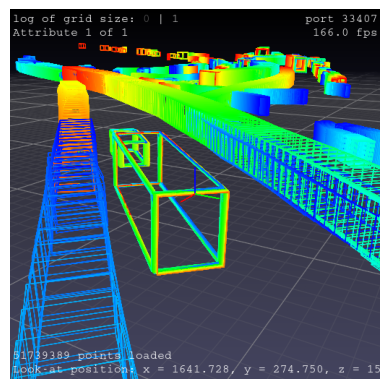

In [37]:
v.capture("temp.png")
plt.imshow(plt.imread("temp.png"))
plt.axis("off")

In [38]:
vertices = static_annot.bounding_box_vertices(margin=0.0)
print(vertices.shape)

# create more points connecting the bounding box corners for better vis
# xyzs: list of arrays of shape (N, 3)
xyzs = py_utils.visualization_pptk.make_bounding_boxes_lines(vertices)
inds = [np.repeat(n, len(xyz)) for n, xyz in enumerate(xyzs)]

xyzs = np.vstack(xyzs)
inds = np.hstack(inds)

# use the inds to differentiate boxes by color
v = pptk.viewer(xyzs, inds)

(1886, 8, 3)


(-0.5, 511.5, 511.5, -0.5)

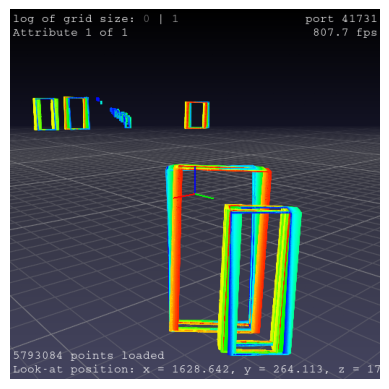

In [39]:
v.capture("temp.png")
plt.imshow(plt.imread("temp.png"))
plt.axis("off")

interact with point clouds

In [ ]:
# here: demo a brutal way to filter out dynamic point clouds
# remove points clouds enclosed by the dynamic bounding boxes

moving_point_indices = moving_annot.is_points_in_bounding_boxes(
    points=sweep_sequence.xyz,
    margin=0.0,
    separate=False,
)
moving_point_indices.shape, moving_point_indices[:10]

((2185891,), array([10, 18, 26, 30, 40, 51, 55, 65, 79, 83]))

In [50]:
mask = np.zeros(len(sweep_sequence.xyz), dtype=bool)
mask[moving_point_indices] = True

In [52]:
v1 = pptk.viewer(sweep_sequence.xyz, sweep_sequence.xyz[:, 2])
v2 = pptk.viewer(sweep_sequence.xyz[mask], sweep_sequence.xyz[mask][:, 2])
v3 = pptk.viewer(sweep_sequence.xyz[~mask], sweep_sequence.xyz[~mask][:, 2])

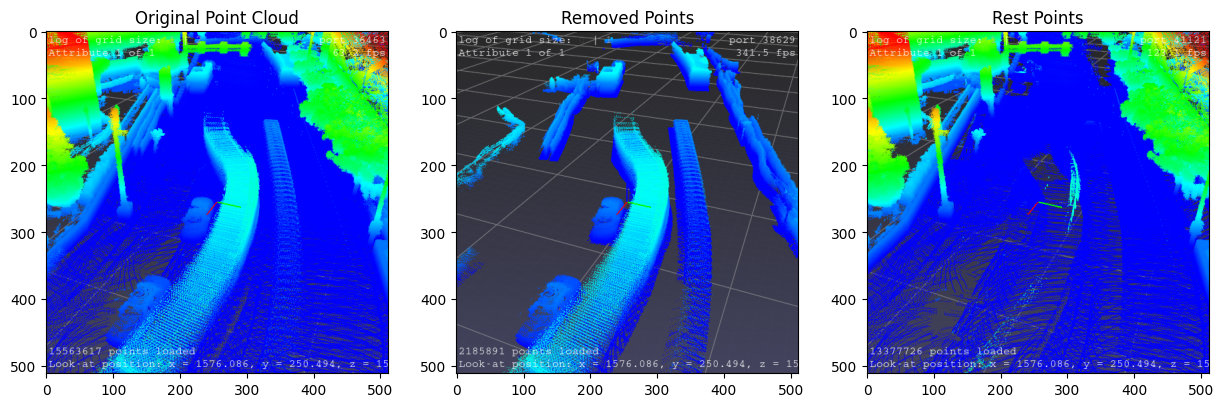

In [63]:
v1.capture("temp.1.png")
v2.capture("temp.2.png")
v3.capture("temp.3.png")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("Original Point Cloud")
axs[0].imshow(plt.imread("temp.1.png"))
axs[1].set_title("Removed Points")
axs[1].imshow(plt.imread("temp.2.png"))
axs[2].set_title("Rest Points")
axs[2].imshow(plt.imread("temp.3.png"))

---
Image Sequences & Camera Sequences

In [64]:
camera_sequence = argoverse2.CameraSequence(log_id)
camera_sequence

<CameraSequence contains: 9 cameras>
	<ImageSequences contains 319 2048x1550 images> (ring_front_center)
	<ImageSequences contains 319 1550x2048 images> (ring_front_left)
	<ImageSequences contains 319 1550x2048 images> (ring_front_right)
	<ImageSequences contains 319 1550x2048 images> (ring_rear_left)
	<ImageSequences contains 319 1550x2048 images> (ring_rear_right)
	<ImageSequences contains 319 1550x2048 images> (ring_side_left)
	<ImageSequences contains 319 1550x2048 images> (ring_side_right)
	<ImageSequences contains 319 1550x2048 images> (stereo_front_left)
	<ImageSequences contains 319 1550x2048 images> (stereo_front_right)

In [ ]:
# to get a particular image sequences

# either
image_sequence = camera_sequence.get_a_camera("ring_front_left")
print(image_sequence)
# or
image_sequence = argoverse2.ImageSequence(log_id, "ring_front_left")
print(image_sequence)

<ImageSequences contains 319 1550x2048 images> (ring_front_left)
<ImageSequences contains 319 1550x2048 images> (ring_front_left)


In [77]:
# indexing
print(image_sequence[0])
print(image_sequence[:5])
print(image_sequence[10:16])
print(image_sequence[slice(20, 27)])

<ImageSequences contains 1 1550x2048 images> (ring_front_left)
<ImageSequences contains 5 1550x2048 images> (ring_front_left)
<ImageSequences contains 6 1550x2048 images> (ring_front_left)
<ImageSequences contains 7 1550x2048 images> (ring_front_left)


In [70]:
# time synchronization between point clouds and images
sync_cam_seq = camera_sequence.align_timestamps(sweep_sequence.timestamps)
print(sync_cam_seq)

sync_img_seq = image_sequence.align_timestamps(sweep_sequence.timestamps)
print(sync_img_seq)

<CameraSequence contains: 9 cameras>
	<ImageSequences contains 157 2048x1550 images> (ring_front_center)
	<ImageSequences contains 157 1550x2048 images> (ring_front_left)
	<ImageSequences contains 157 1550x2048 images> (ring_front_right)
	<ImageSequences contains 157 1550x2048 images> (ring_rear_left)
	<ImageSequences contains 157 1550x2048 images> (ring_rear_right)
	<ImageSequences contains 157 1550x2048 images> (ring_side_left)
	<ImageSequences contains 157 1550x2048 images> (ring_side_right)
	<ImageSequences contains 157 1550x2048 images> (stereo_front_left)
	<ImageSequences contains 157 1550x2048 images> (stereo_front_right)
<ImageSequences contains 157 1550x2048 images> (ring_front_left)


(1550, 2048, 3)


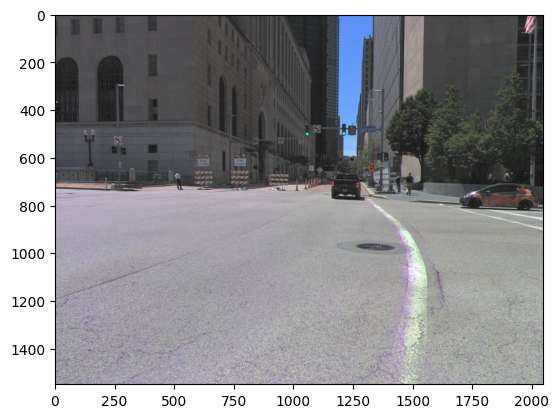

In [ ]:
# a uint8 numpy array (H, W, 3)
img = sync_img_seq.get_an_image(0)
print(img.shape)
plt.imshow(img)

In [88]:
print("intrinsic")
print(sync_img_seq.intrinsic)  # (3, 3) matrix
print("extrinsic")
print(sync_img_seq.extrinsic[:1])  # (n, 4, 4) matrices

intrinsic
[[1688.82236939    0.         1026.41646131]
 [   0.         1688.82236939  769.05823583]
 [   0.            0.            1.        ]]
extrinsic
[[[  -0.94510162    0.00738034   -0.32669321 1617.31721266]
  [   0.32675733    0.03219279   -0.94455983  262.45506278]
  [   0.003546     -0.99945443   -0.03283704   15.50314703]
  [   0.            0.            0.            1.        ]]]


In [93]:
# resize image sequences will result in new intrinsic parameters

H, W = sync_img_seq.figsize
resized_img_seq = sync_img_seq.resize(int(H / 2), int(W / 2))
print(resized_img_seq)
print(resized_img_seq.intrinsic)  # new (3, 3) matrix after resizing

<ImageSequences contains 157 775x1024 images> (ring_front_left)
[[844.4111847    0.         513.20823065]
 [  0.         844.4111847  384.52911791]
 [  0.           0.           1.        ]]


interact with point clouds

In [105]:
# trace points in point clouds to image plane to get depth maps

# single sweep on image plane
depth_map_1 = resized_img_seq.get_a_depth_map(
    0,
    sweep_sequence[0].xyz,
    invalid_value=-1,
    min_distance=0,
    max_distance=np.inf,
)

# all sweeps on image plane
depth_map_2 = resized_img_seq.get_a_depth_map(
    0,
    sweep_sequence.xyz,
    invalid_value=-1,
    min_distance=0,
    max_distance=np.inf,
)

# all sweeps (excluded moving objects) on image plane
depth_map_3 = resized_img_seq.get_a_depth_map(
    0,
    sweep_sequence.xyz[~mask],
    invalid_value=-1,
    min_distance=0,
    max_distance=np.inf,
)

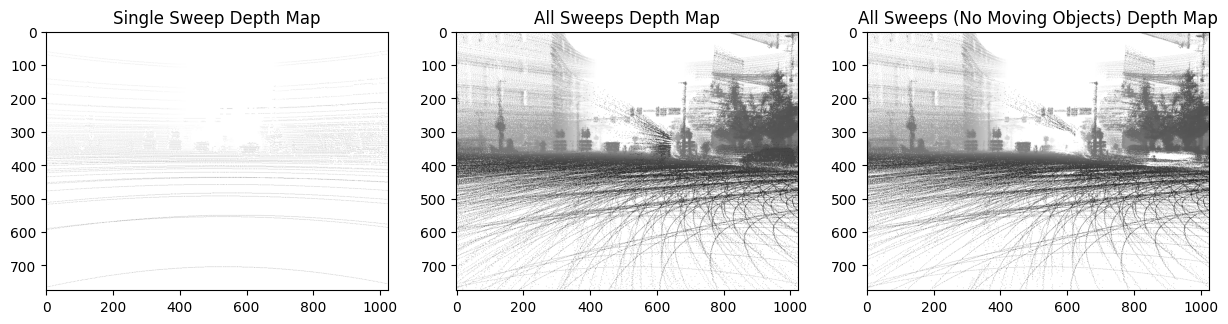

In [ ]:
func = py_utils.visualization_pptk.make_color(
    s_min=0,
    s_max=80,
    color_map=np.array(
        [
            [0, 0, 0],  # black
            [1, 1, 1],  # white
        ]
    ),
)

colour_depth_map_1 = func(depth_map_1)
colour_depth_map_1[depth_map_1 == -1] = 1  # set invalid values to white

colour_depth_map_2 = func(depth_map_2)
colour_depth_map_2[depth_map_2 == -1] = 1  # set invalid values to white

colour_depth_map_3 = func(depth_map_3)
colour_depth_map_3[depth_map_3 == -1] = 1  # set invalid values to white

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("Single Sweep Depth Map")
axs[0].imshow(colour_depth_map_1)
axs[1].set_title("All Sweeps Depth Map")
axs[1].imshow(colour_depth_map_2)
axs[2].set_title("All Sweeps (No Moving Objects) Depth Map")
axs[2].imshow(colour_depth_map_3)

In [126]:
FOV_mask_2 = sync_img_seq[:10].FOV_mask(
    sweep_sequence.xyz,
    max_distance=80,
    min_distance=0,
    verbose=True,
)

[==============================] 100.0%


In [ ]:
# Also, image sequences can provide FOV information to help with point
# cloud filtering

# binary mask whose length is equal to the number of points
FOV_mask_1 = sync_img_seq[0].FOV_mask(
    sweep_sequence.xyz,
    max_distance=80,
    min_distance=0,
    verbose=True,
)

FOV_mask_2 = sync_img_seq[:5].FOV_mask(
    sweep_sequence.xyz,
    max_distance=80,
    min_distance=0,
    verbose=True,
)

FOV_mask_3 = sync_img_seq[::40].FOV_mask(
    sweep_sequence.xyz,
    max_distance=80,
    min_distance=0,
    verbose=True,
)

v = pptk.viewer(sweep_sequence.xyz, sweep_sequence.xyz[:, 2])

[==============================] 100.0%
[==============================] 100.0%
[==============================] 100.0%


In [ ]:
# select corresponding point indices
v.set(selected=np.where(FOV_mask_1)[0])
v.capture("temp.1.png")
v.set(selected=np.where(FOV_mask_2)[0])
v.capture("temp.2.png")
v.set(selected=np.where(FOV_mask_3)[0])
v.capture("temp.3.png")

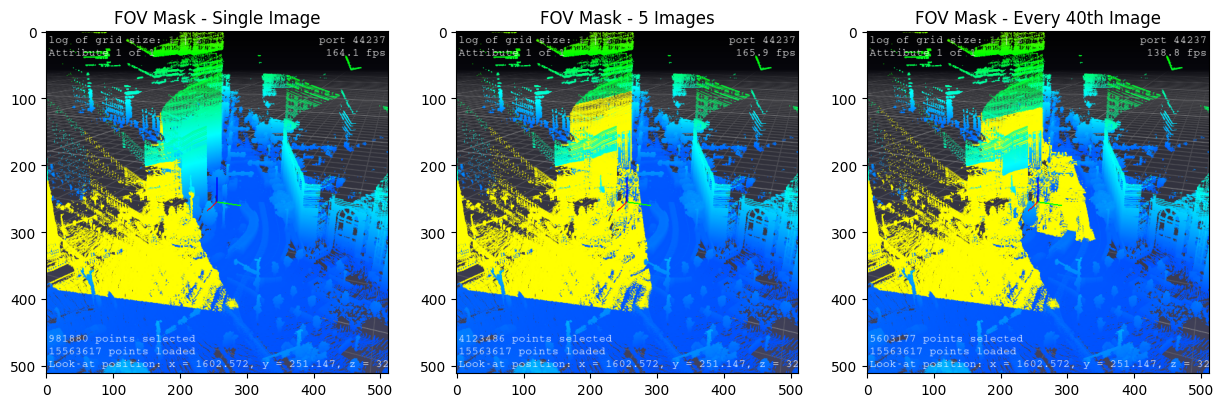

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].set_title("FOV Mask - Single Image")
axs[0].imshow(plt.imread("temp.1.png"))
axs[1].set_title("FOV Mask - 5 Images")
axs[1].imshow(plt.imread("temp.2.png"))
axs[2].set_title("FOV Mask - Every 40th Image")
axs[2].imshow(plt.imread("temp.3.png"))